Step 1: READ THE DATA 
-

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
tele=pd.read_csv("telecom_churn_data.csv")
tele

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


Step 2 SEPARATE CATOGOTICAL TO NUMERICAL
-

In [15]:
cat=tele.select_dtypes(include='object').columns
num=tele.select_dtypes(exclude='object').columns

In [17]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [19]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

Step 3 DATA QUICK CHECK (SHAPE,DTYPES,COLUMNS)
-

In [21]:
tele.shape

(2000, 16)

In [506]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_pandas_datetime_CAPI',
 '_pandas_parser_CAPI',
 '_testing',
 '_typing',
 '_version_meson',
 'annota

In [23]:
tele.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [25]:
tele.size

32000

In [27]:
tele.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [29]:
tele.values

array([[2015, 100198, '409-8743', ..., 4.0, 1, 0.0],
       [2015, 100643, '340-5930', ..., 3.0, 2, 0.0],
       [2015, 100756, '372-3750', ..., 4.0, 5, 1.0],
       ...,
       [2015, 998474, '353-2080', ..., 5.0, 0, 0.0],
       [2015, 998934, '359-7788', ..., nan, 3, 0.0],
       [2015, 999961, '414-1496', ..., 3.0, 1, 1.0]], dtype=object)

In [31]:
tele.isnull()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [33]:
tele.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

Step 4 NULL VALUE ANANLYSIS
-

- A) CHECK IF ANY NULL VALUE AS PRESENT\
- B) FILL NULL VALUES WITH MEDIAN OR KNNIMPUTER FOR NUMERICAL 
      COLUMNS
- C) FILL THE NULL VALUES WITH MODE FOR CATEGORIES COLUMNS

In [35]:
tele=pd.read_csv("telecom_churn_data.csv")
mode=tele['gender'].mode()
tele['gender']=tele['gender'].fillna(mode.values[0])
tele

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [37]:
tele.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [311]:
from sklearn.impute import KNNImputer
kn=KNNImputer()
tele['maximum_days_inactive']=kn.fit_transform(tele[['maximum_days_inactive']])
tele['maximum_days_inactive'] = tele['maximum_days_inactive'].astype(int)

In [315]:
from sklearn.impute import KNNImputer
kn=KNNImputer()
tele['churn']=kn.fit_transform(tele[['churn']])
tele['churn'] = tele['churn'].astype(int)

In [307]:
tele.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [52]:
tele['phone_no'].value_counts()

phone_no
409-8743    1
419-5505    1
418-9385    1
347-1914    1
360-6309    1
           ..
330-8142    1
357-5801    1
420-5990    1
390-2891    1
414-1496    1
Name: count, Length: 2000, dtype: int64

Step 5  DO SOME DATA PREPROCEING 
-

- IF ANY COLUMNS IS CPRRUPTED 
- EX: NUMERICAL VALUES IN CATEGORICAL COLUMNS 
- EX: CATOGORICAL VALUES IN NUMEIRCAL COLUMNS

In [63]:
for i in cat:
    print(f"Checking column: {i}")
    has_numeric = tele[i].str.contains(r'\d').any()
    if has_numeric:
        print(f"Column '{i}' contains numeric values.")
    else:
        print(f"Column '{i}' does not contain numeric values.")

Checking column: phone_no
Column 'phone_no' contains numeric values.
Checking column: gender
Column 'gender' does not contain numeric values.
Checking column: multi_screen
Column 'multi_screen' does not contain numeric values.
Checking column: mail_subscribed
Column 'mail_subscribed' does not contain numeric values.


In [ ]:
step 6 DROP THE  COLOUMN
       we drop this three columns
       (['year','customer_id','phone_no']
       WHICH MEANS A DATA HAS MORE UNIQUE LABLES  
       AND DROP THE SINGLE VALUES COLUMNS

In [81]:
tele.drop(['year','customer_id','phone_no'],axis=1,inplace=True)

In [317]:
tele

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,Male,53,94,no,no,128.85,15.6,14.60,110,16,5,0,0
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,3,3,0


Step 7 CATEORICAL COLUMNS ANALYSIS 
-

- A) FREQUENCY TABLE
- B) BAR  CHART 
- C) PIE CHART


- A) Frequency Table:

In [95]:
import os 
cwd=os.getcwd()
folder="Telecom_FREQ_Tables"
new_dir=os.path.join(cwd,folder)
try:
    os.makedirs(new_dir)
except Exception as e:
    print(e)
cat=tele.select_dtypes(include='object').columns
for i in cat:
    keys=tele[i].value_counts().keys()
    values=tele[i].value_counts().values
    col=["Lables",'No Of Count']
    df=pd.DataFrame(zip(keys,values),columns=col)
    name=f"{i}_table.csv"
    newfile=os.path.join(new_dir,name)
    df.to_csv(newfile)
    

In [330]:
cat

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

- B) BAR  CHART

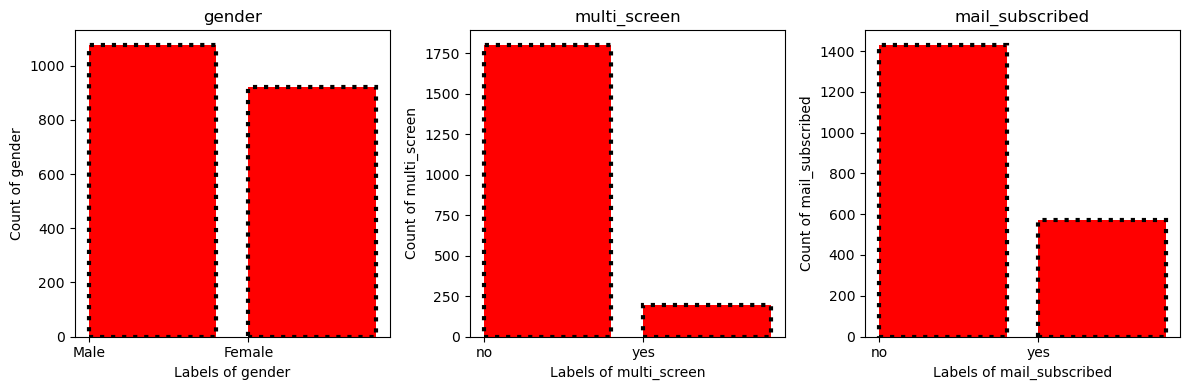

In [332]:
plt.figure(figsize=(12,4))
for idx, i in enumerate(cat, 1):
    keys = tele[i].value_counts().keys()
    value = tele[i].value_counts().values
    plt.subplot(1, len(cat), idx)
    plt.xlabel(f"Labels of {i}")
    plt.ylabel(f"Count of {i}")
    plt.title(i)
    plt.bar(keys, value,color="r",align="edge",edgecolor="black",linestyle=":",linewidth=3)
plt.tight_layout()  
plt.show()

- C) PIE CHART

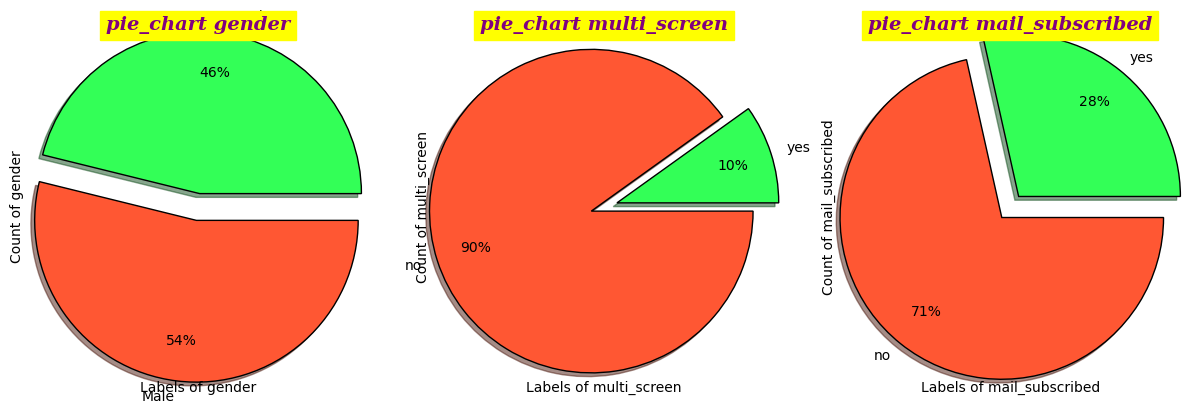

In [232]:
plt.figure(figsize=(12,4))
for idx, i in enumerate(cat, 1):
    keys = tele[i].value_counts().keys()
    value = tele[i].value_counts().values
    explode = [0.1] * len(keys)
    plt.subplot(1, len(cat), idx,aspect='equal')
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.xlabel(f"Labels of {i}")
    plt.ylabel(f"Count of {i}")
    plt.title(i)
    plt.pie(value,explode=explode,labels=keys,colors=['#FF5733', '#33FF57', '#3357FF', '#FFC300', '#DAF7A6'],
            autopct='%0.f%%',pctdistance=0.75,radius=1.2,counterclock=False,shadow=True,wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
           textprops={'fontsize': 10, 'color': 'black'},frame=False,normalize=True)
    plt.title(f"pie_chart {i}",fontsize=14,fontweight='bold',color='purple',
              style='italic', family='serif',backgroundcolor='yellow')
plt.tight_layout()  
plt.show()

Step:8 NUMERICAL COLUMNS ANALYSIS
-

   - A) HISTOGRAM : 
   - B) DISTRIBUTION 
   - C) BOX PLOT

In [334]:
num=tele.select_dtypes(exclude='object').columns
num

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

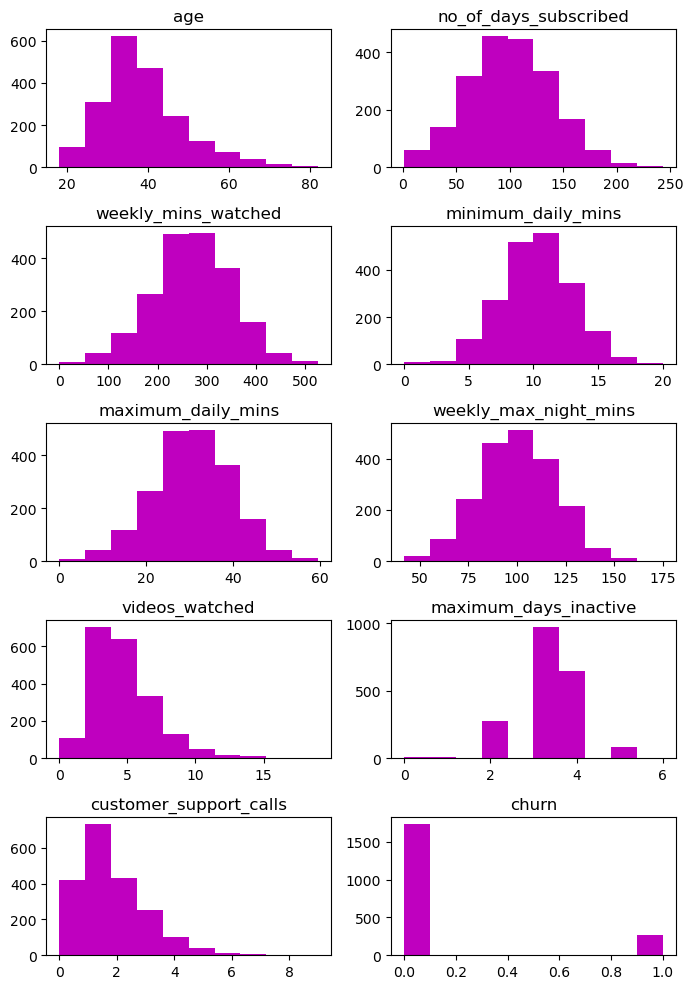

In [336]:
plt.figure(figsize=(7, 10))
for idx, i in enumerate(num, 1):
    plt.subplot(5,2, idx,aspect='equal')
    plt.hist(tele[i],color="m")
    plt.gca().set_aspect('auto')
    plt.title(i)
plt.tight_layout()
plt.show()

- C) BOX PLOT

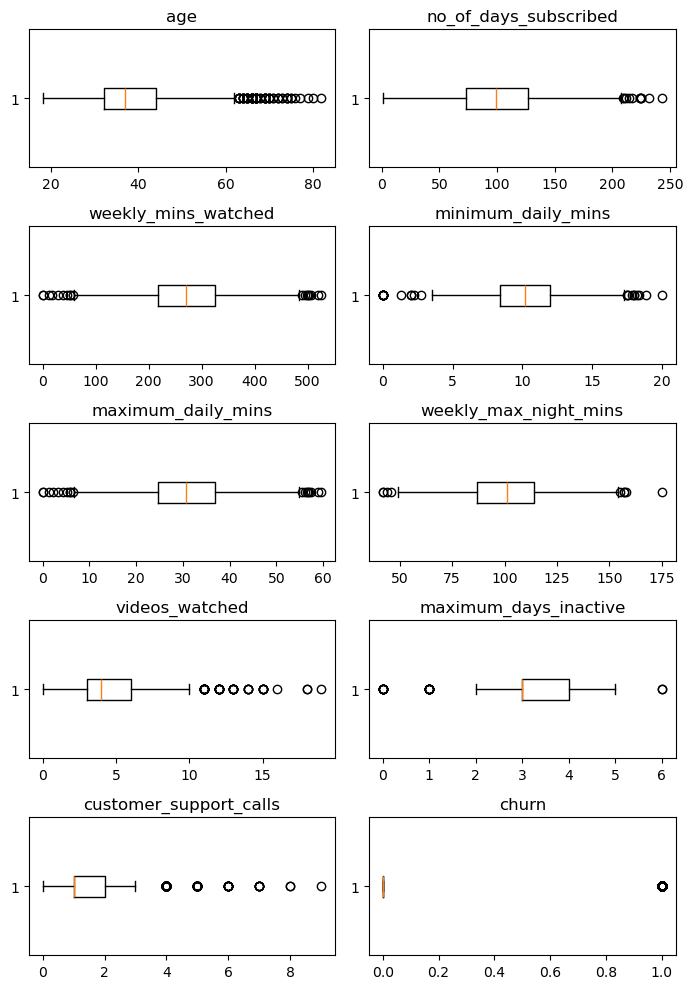

In [328]:
plt.figure(figsize=(7, 10))
for idx, i in enumerate(num, 1):
    plt.subplot(5,2, idx,aspect='equal')
    plt.boxplot(tele[i],vert=False)
    plt.gca().set_aspect('auto')
    plt.title(i)
plt.tight_layout()
plt.show()

Step 9 OUTLIER ANALYSIS
IMPUTE THE OUTLIER WITH MEDIAN 
-

In [373]:
for i in num:
    out=tele[i]
    Q1=np.percentile(out,25)
    Q3=np.percentile(out,75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    med=age.median()
    new=[]
    for i in age:
        if i<LB or i>UB:
            new.append(med)
        else:
            new.append(i)
    tele[non]=new


In [401]:
tele.drop(37,axis=1,inplace=True)


Step :10 FIND THE CORREATION BETWEEN NUMERICAL COLUMNS
HEAT MAP
-

In [403]:
corr=tele.corr(numeric_only=True)
corr

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
age,1.000000,0.025164,0.014643,0.016108,0.014657,0.016661,0.026851,0.026848,-0.016602,-0.016872
no_of_days_subscribed,0.025164,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002517
weekly_mins_watched,0.014643,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.162876
minimum_daily_mins,0.016108,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.066646
maximum_daily_mins,0.014657,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.162874
weekly_max_night_mins,0.016661,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.006917
videos_watched,0.026851,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.019314
maximum_days_inactive,0.026848,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044778
customer_support_calls,-0.016602,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.204774
churn,-0.016872,0.002517,0.162876,0.066646,0.162874,0.006917,-0.019314,0.044778,0.204774,1.000000


<Axes: >

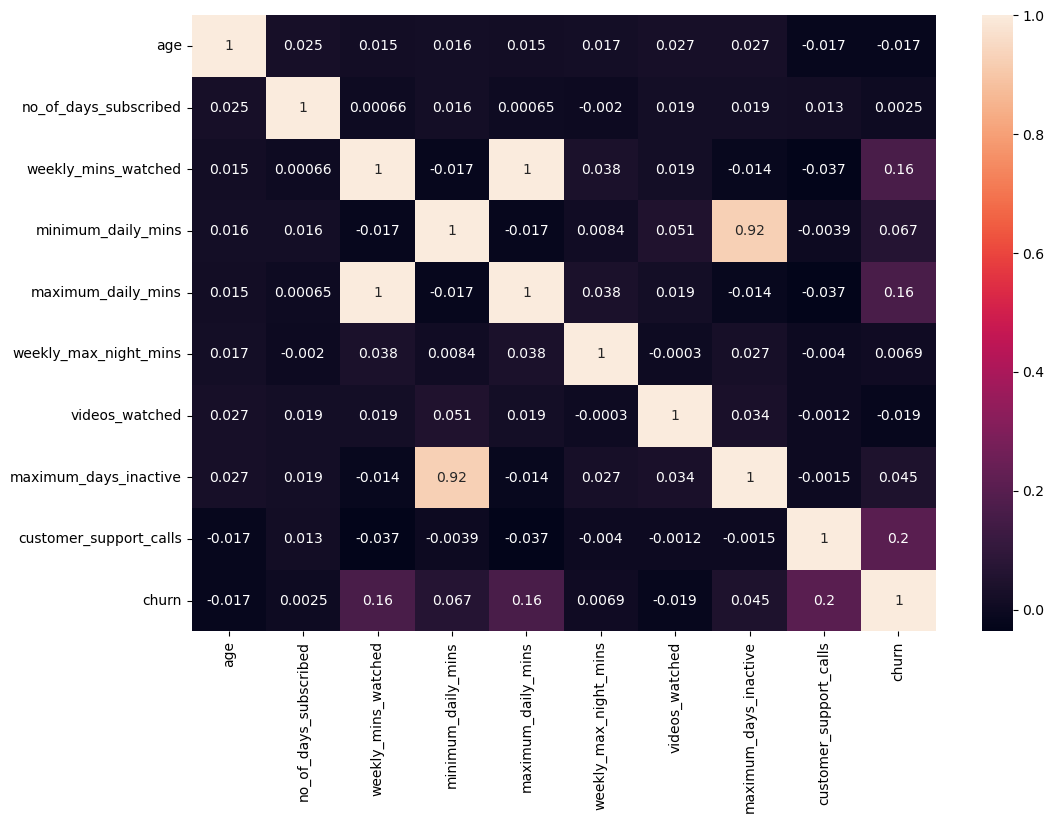

In [413]:
corr=tele.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True,robust=True)

Step :11 CONVERT CAT TO NUMEIRCAL
-

- A) LABELENCODER
- B) ONEHOTENCODER 

In [418]:
tele

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36.0,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,Female,39.0,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,Female,37.0,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,Female,24.0,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,Female,40.0,191,no,no,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54.0,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,Male,45.0,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,Male,53.0,94,no,no,128.85,15.6,14.60,110,16,5,0,0
1998,Male,40.0,94,no,no,178.05,10.4,20.18,100,6,3,3,0


In [426]:
cat

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [446]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    tele[i]=le.fit_transform(tele[i])
tele_num_format=tele
tele_num_format

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36.0,62,0,0,148.35,12.2,16.81,82,1,4,1,0
1,0,39.0,149,0,0,294.45,7.7,33.37,87,3,3,2,0
2,0,37.0,126,0,0,87.30,11.9,9.89,91,1,4,5,1
3,0,24.0,131,0,1,321.30,9.5,36.41,102,4,3,3,0
4,0,40.0,191,0,0,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54.0,75,0,1,182.25,11.3,20.66,97,5,4,2,0
1996,1,45.0,127,0,0,273.45,9.3,30.99,116,3,3,1,0
1997,1,53.0,94,0,0,128.85,15.6,14.60,110,16,5,0,0
1998,1,40.0,94,0,0,178.05,10.4,20.18,100,6,3,3,0


Step: 12. SCALE THE DATA 
-

- A) Z STANDARDIAZATION
- B) NORMALIAZATION

1. Standardization (Z-score Normalization)

In [462]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in tele_num_format:
    tele_num_format[i]=ss.fit_transform(tele_num_format[[i]])
tele_Zstan=tele_num_format
tele_Zstan

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,-1.080207,-0.196365,-0.949794,-0.331478,-0.631349,-1.512805,0.718645,-1.513198,-0.943196,-1.400222,0.936875,-0.416022,-0.388263
1,-1.080207,0.152005,1.239136,-0.331478,-0.631349,0.301392,-0.897256,0.301222,-0.687109,-0.596074,-0.307315,0.344530,-0.388263
2,-1.080207,-0.080241,0.660453,-0.331478,-0.631349,-2.270893,0.610919,-2.271398,-0.482239,-1.400222,0.936875,2.626185,2.575575
3,-1.080207,-1.589844,0.786254,-0.331478,1.583910,0.634802,-0.250896,0.634304,0.081154,-0.194001,-0.307315,1.105082,-0.388263
4,-1.080207,0.268129,2.295860,-0.331478,-0.631349,-0.337488,0.251829,-0.337550,-0.891979,1.012221,-0.307315,-0.416022,-0.388263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.080207,1.893855,-0.622713,-0.331478,1.583910,-1.091852,0.395465,-1.091367,-0.174933,0.208073,0.936875,0.344530,-0.388263
1996,0.925748,0.848745,0.685613,-0.331478,-0.631349,0.040625,-0.322714,0.040454,0.798199,-0.596074,-0.307315,-0.416022,-0.388263
1997,0.925748,1.777732,-0.144671,-0.331478,-0.631349,-1.754946,1.939549,-1.755340,0.490894,4.630885,2.181065,-1.176574,-0.388263
1998,0.925748,0.268129,-0.144671,-0.331478,-0.631349,-1.144005,0.072285,-1.143959,-0.021281,0.610147,-0.307315,1.105082,-0.388263


2. Min-Max Scaling (Normalization)

In [468]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in tele_num_format:
    tele_num_format[i]=mm.fit_transform(tele_num_format[[i]])
tele_Minmax_Norm=tele_num_format
tele_Minmax_Norm

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0.0,0.409091,0.252066,0.0,0.0,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0
1,0.0,0.477273,0.611570,0.0,0.0,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0
2,0.0,0.431818,0.516529,0.0,0.0,0.165906,0.595,0.165828,0.368421,0.052632,0.666667,0.555556,1.0
3,0.0,0.136364,0.537190,0.0,1.0,0.610604,0.475,0.610496,0.451128,0.210526,0.500000,0.333333,0.0
4,0.0,0.500000,0.785124,0.0,0.0,0.461802,0.545,0.461771,0.308271,0.368421,0.500000,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.818182,0.305785,0.0,1.0,0.346351,0.565,0.346412,0.413534,0.263158,0.666667,0.222222,0.0
1996,1.0,0.613636,0.520661,0.0,0.0,0.519669,0.465,0.519618,0.556391,0.157895,0.500000,0.111111,0.0
1997,1.0,0.795455,0.384298,0.0,0.0,0.244869,0.780,0.244802,0.511278,0.842105,0.833333,0.000000,0.0
1998,1.0,0.500000,0.384298,0.0,0.0,0.338369,0.520,0.338364,0.436090,0.315789,0.500000,0.333333,0.0


**FINALY WE HAVE 2 DATA SETS IN THIS**
HERE ZSCORE 
AND MINMAX SCALER IS CONSIDERED AS ONE DATA SET
-

FIRST DATA SET IS (without scale but data in Numerical format)
-


In [473]:
tele_num_format

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0.0,0.409091,0.252066,0.0,0.0,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0
1,0.0,0.477273,0.611570,0.0,0.0,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0
2,0.0,0.431818,0.516529,0.0,0.0,0.165906,0.595,0.165828,0.368421,0.052632,0.666667,0.555556,1.0
3,0.0,0.136364,0.537190,0.0,1.0,0.610604,0.475,0.610496,0.451128,0.210526,0.500000,0.333333,0.0
4,0.0,0.500000,0.785124,0.0,0.0,0.461802,0.545,0.461771,0.308271,0.368421,0.500000,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.818182,0.305785,0.0,1.0,0.346351,0.565,0.346412,0.413534,0.263158,0.666667,0.222222,0.0
1996,1.0,0.613636,0.520661,0.0,0.0,0.519669,0.465,0.519618,0.556391,0.157895,0.500000,0.111111,0.0
1997,1.0,0.795455,0.384298,0.0,0.0,0.244869,0.780,0.244802,0.511278,0.842105,0.833333,0.000000,0.0
1998,1.0,0.500000,0.384298,0.0,0.0,0.338369,0.520,0.338364,0.436090,0.315789,0.500000,0.333333,0.0


FIRST DATA SET IS (with scaling data in Numerical format)
WE USED 2 METHOD HERE 
-

STANDARDIAZATION
-

In [476]:
tele_Zstan

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0.0,0.409091,0.252066,0.0,0.0,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0
1,0.0,0.477273,0.611570,0.0,0.0,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0
2,0.0,0.431818,0.516529,0.0,0.0,0.165906,0.595,0.165828,0.368421,0.052632,0.666667,0.555556,1.0
3,0.0,0.136364,0.537190,0.0,1.0,0.610604,0.475,0.610496,0.451128,0.210526,0.500000,0.333333,0.0
4,0.0,0.500000,0.785124,0.0,0.0,0.461802,0.545,0.461771,0.308271,0.368421,0.500000,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.818182,0.305785,0.0,1.0,0.346351,0.565,0.346412,0.413534,0.263158,0.666667,0.222222,0.0
1996,1.0,0.613636,0.520661,0.0,0.0,0.519669,0.465,0.519618,0.556391,0.157895,0.500000,0.111111,0.0
1997,1.0,0.795455,0.384298,0.0,0.0,0.244869,0.780,0.244802,0.511278,0.842105,0.833333,0.000000,0.0
1998,1.0,0.500000,0.384298,0.0,0.0,0.338369,0.520,0.338364,0.436090,0.315789,0.500000,0.333333,0.0


NORMALIAZATION 
-

In [478]:
tele_Minmax_Norm

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0.0,0.409091,0.252066,0.0,0.0,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0
1,0.0,0.477273,0.611570,0.0,0.0,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0
2,0.0,0.431818,0.516529,0.0,0.0,0.165906,0.595,0.165828,0.368421,0.052632,0.666667,0.555556,1.0
3,0.0,0.136364,0.537190,0.0,1.0,0.610604,0.475,0.610496,0.451128,0.210526,0.500000,0.333333,0.0
4,0.0,0.500000,0.785124,0.0,0.0,0.461802,0.545,0.461771,0.308271,0.368421,0.500000,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.818182,0.305785,0.0,1.0,0.346351,0.565,0.346412,0.413534,0.263158,0.666667,0.222222,0.0
1996,1.0,0.613636,0.520661,0.0,0.0,0.519669,0.465,0.519618,0.556391,0.157895,0.500000,0.111111,0.0
1997,1.0,0.795455,0.384298,0.0,0.0,0.244869,0.780,0.244802,0.511278,0.842105,0.833333,0.000000,0.0
1998,1.0,0.500000,0.384298,0.0,0.0,0.338369,0.520,0.338364,0.436090,0.315789,0.500000,0.333333,0.0


**we will try to select the important feature For ML model
3 TYPE OF DATA SET:PCA: principle component analysis(will be covered in ML)**
- WE WILL IMPLEMENT THIS DURING MACHINE LEARNING 
-